# 2. Do older planes suffer more delays?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as Cal

In [2]:
#importing the datsets 
data_f = pd.read_csv(r"C:\Users\Ridhwan\Desktop\UOL\PROGRAMMING COURSEWORK\joined_df.csv")

In [3]:
# changing settings to display all columns
pd.set_option("display.max_columns", None)

In [4]:
data_f

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979491,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,N109DL,263.0,282.0,241.0,-22.0,-3.0,ATL,ONT,1900,7,15,0,0,0,0,0
13979492,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,N932DL,93.0,83.0,54.0,10.0,0.0,ATL,MEM,332,7,32,0,0,0,0,0
13979493,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,N306DL,154.0,158.0,121.0,-8.0,-4.0,ATL,SAT,874,4,29,0,0,0,0,0
13979494,2005,12,22,4,924.0,925,1056.0,1111,DL,904,N981DL,152.0,166.0,129.0,-15.0,-1.0,ATL,MSP,906,4,19,0,0,0,0,0


In [5]:
data_f.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

Looking at our availbale columns on the main dataset it is apparent we dont have information on the year the planes are manufactured but we do have their tail number which we can use to find out the year plane was manufactured with the plane dataset. 

In [6]:
planes_ds= pd.read_csv(r"C:\Users\Ridhwan\Desktop\UOL\PROGRAMMING COURSEWORK\Unzipped Data set\dataverse_files\plane-data.csv")

In [7]:
planes_ds.shape

(5029, 9)

WE have 9 columns in our plane-data,from first glance it is apparent the the useful rows would probably be "tailnum","issue_date" and "year".
For our question "Do older planes suffer more delays?" we will be assuming that older planes refers to year the plane was manufactured rather than when the plane was issued to fly. 
So we will be removing "issue_date" column aswell.

In [8]:
#Renaming coloumns for inner join
planes_ds.rename(columns={"tailnum":"TailNum"}, inplace = True)

In [9]:
planes_ds.status.value_counts()

Valid                4479
Registered to Mfr       1
Name: status, dtype: int64

In [10]:
planes_ds.drop(planes_ds[(planes_ds['status'] == 'Registered to Mfr')].index,inplace= True)

In [11]:
planes_ds.status.value_counts()

Valid                4479
Registered to Mfr       1
Name: status, dtype: int64

In [12]:
planes_ds.year.value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
None    145
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1980      8
1976      8
1978      8
1977      6
1982      6
0000      3
1973      3
1959      2
1963      2
1974      2
1970      2
1956      1
1972      1
1962      1
1957      1
1964      1
1965      1
1946      1
1966      1
1971      1
Name: year, dtype: int64

In [13]:
#Noticing categories "0000" and "None", we will be removing rows

In [14]:
planes_ds.drop(planes_ds[(planes_ds['year'] == '0000')|(planes_ds['year'] == 'None')].index,inplace= True)

In [15]:
#dropping unneeded columns
planes_ds.drop(['type', 'manufacturer','issue_date','model','status','aircraft_type','engine_type'], axis = 1, inplace= True)

In [16]:
planes_ds.shape

(4881, 2)

In [17]:
pd.isnull(planes_ds).sum(axis=0)

TailNum      0
year       549
dtype: int64

In [18]:
planes_ds = planes_ds[pd.notnull(planes_ds["year"])]

In [19]:
pd.isnull(planes_ds).sum(axis=0)

TailNum    0
year       0
dtype: int64

In [20]:
planes_ds.shape

(4332, 2)

In [21]:
planes_ds

,TailNum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [22]:
data_f = pd.merge(data_f, planes_ds, on= ['TailNum'])

In [23]:
data_f.year.value_counts()

2001    1029670
2002     847092
2000     777503
2003     772927
1999     761494
1998     655090
2004     596044
2005     385798
1996     357948
1988     355445
1997     337449
1991     328692
1990     315660
1994     311965
1987     307542
1992     307077
1995     302062
1989     284774
1985     239912
1993     227219
1986     201668
2006      81094
1984      67709
1968      65751
1967      39522
1969      34980
1983      30478
1979      29224
1976      24907
1975      24579
1978      21322
1980      19644
1977      13530
1973       7911
1982       6930
1970       5927
1959       5006
2007       3730
1966       3698
1974       3336
1963       3210
1971       2947
1962       2733
1964       2692
1965       2500
1957       2104
1956        544
1972        528
Name: year, dtype: int64

In [24]:
delayyearplane = data_f.groupby('year').aggregate(mean_ArrDelay = ('ArrDelay', np.mean),
                                                    mean_DepDelay = ('DepDelay', np.mean),
                                                    mean_CarrierDelay = ('CarrierDelay', np.mean),
                                                    mean_WeatherDelay = ('WeatherDelay', np.mean),
                                                    mean_NASDelay = ('NASDelay', np.mean),
                                                    mean_SecurityDelay = ('SecurityDelay', np.mean),
                                                    mean_LateAircraftDelay = ('LateAircraftDelay', np.mean))

In [25]:
delayyearplane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1956 to 2007
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean_ArrDelay           48 non-null     float64
 1   mean_DepDelay           48 non-null     float64
 2   mean_CarrierDelay       48 non-null     float64
 3   mean_WeatherDelay       48 non-null     float64
 4   mean_NASDelay           48 non-null     float64
 5   mean_SecurityDelay      48 non-null     float64
 6   mean_LateAircraftDelay  48 non-null     float64
dtypes: float64(7)
memory usage: 3.0+ KB


In [26]:
delayyearplane = delayyearplane.reset_index()

In [27]:
delayyearplane['year'] = delayyearplane['year'].astype(float)

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010.]),
 [Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010')])

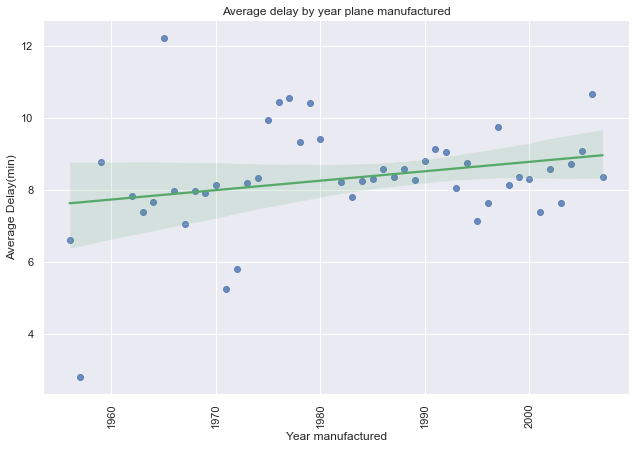

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(data=delayyearplane,line_kws={'color': 'g'}, x="year",y="mean_ArrDelay",  height= 6, aspect=1.5).set(title="Average delay by year plane manufactured", xlabel="Year manufactured",ylabel="Average Delay(min)")
plt.xticks(rotation=90)

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

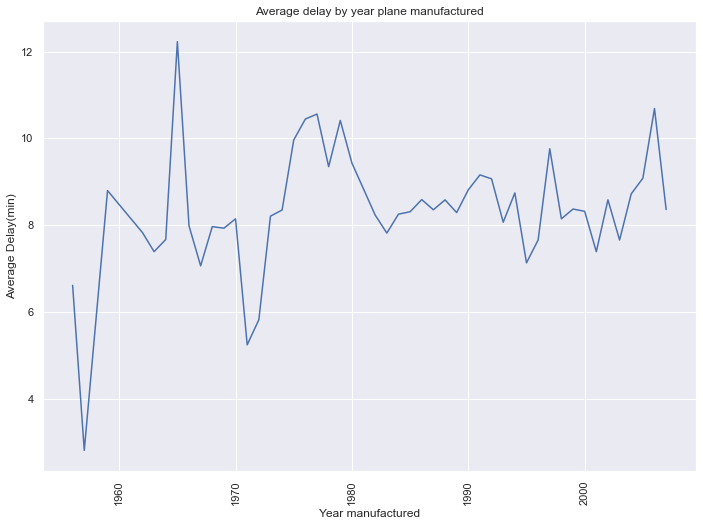

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=delayyearplane, x="year",y="mean_ArrDelay").set(title="Average delay by year plane manufactured", xlabel="Year manufactured",ylabel="Average Delay(min)")
plt.xticks(rotation=90)

In [42]:
test_3 = delayyearplane.drop(['mean_ArrDelay','mean_DepDelay'], axis = 1)
test_3

,year,mean_CarrierDelay,mean_WeatherDelay,mean_NASDelay,mean_SecurityDelay,mean_LateAircraftDelay
0,1956.0,5.051471,0.841912,3.794118,0.275735,2.584559
1,1957.0,1.866445,0.281369,3.522814,0.000000,2.122624
2,1959.0,2.946464,0.724131,5.025370,0.011986,4.427887
3,1962.0,2.899744,0.761068,4.168679,0.034394,4.053055
4,1963.0,2.815576,0.710280,4.059502,0.000000,3.953271
5,1964.0,2.125186,0.934250,4.188336,0.010030,4.478826
6,1965.0,2.278800,0.743200,9.484000,0.060000,3.765200
7,1966.0,5.226879,2.725257,3.640076,0.067875,0.554624
8,1967.0,4.553312,0.872932,2.840519,0.006250,2.021077
9,1968.0,4.542851,1.039178,3.056486,0.015467,2.319143


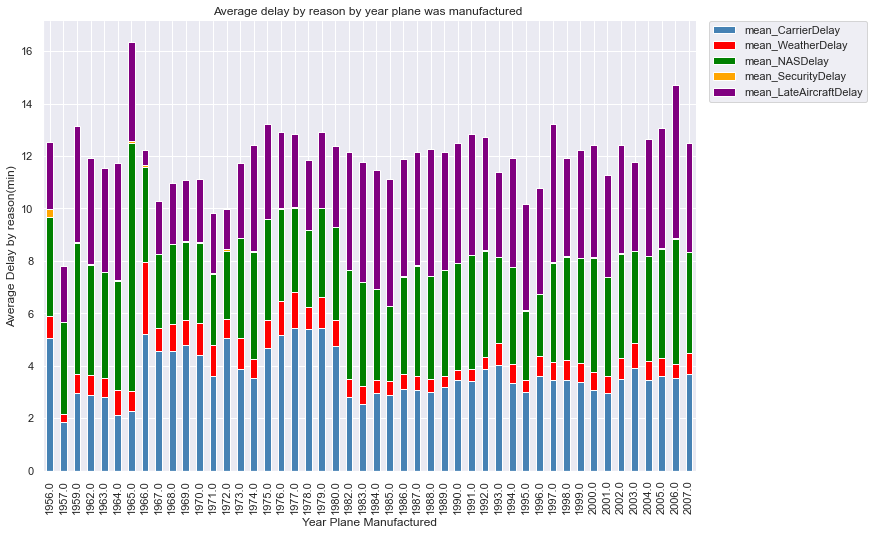

In [45]:
test_3.set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red','green','orange','purple']).set(title="Average delay by reason by year plane was manufactured ", xlabel="Year Plane Manufactured",ylabel="Average Delay by reason(min)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()